In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = '/mnt/StevensPass-GraceLakes_4790_feet_2019.csv'
data = pd.read_csv(file_path)

data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4216 entries, 0 to 4215
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date/Time (PST)             4216 non-null   object 
 1   Temperature (deg F)         4216 non-null   float64
 2   Relative Humidity (%)       4216 non-null   float64
 3   Total Snow Depth (")        4216 non-null   float64
 4   Intermittent/Shot Snow (")  4216 non-null   float64
dtypes: float64(4), object(1)
memory usage: 164.8+ KB


(    Date/Time (PST)  Temperature (deg F)  Relative Humidity (%)  \
 0  25-06-2019 15:00                47.33                  89.90   
 1  25-06-2019 14:00                53.80                  69.82   
 2  25-06-2019 13:00                55.02                  65.32   
 3  25-06-2019 12:00                56.62                  54.77   
 4  25-06-2019 11:00                54.93                  58.87   
 
    Total Snow Depth (")  Intermittent/Shot Snow (")  
 0                 16.46                     -7999.0  
 1                 10.02                     -7999.0  
 2                 12.31                     -7999.0  
 3                 11.77                     -7999.0  
 4                 12.12                     -7999.0  ,
 None)

In [33]:
import numpy as np

# Replace the placeholder value in 'Intermittent/Shot Snow (")' with NaN
data['Intermittent/Shot Snow (")'] = np.where(data['Intermittent/Shot Snow (")'] == -7999.0, np.nan, data['Intermittent/Shot Snow (")'])

# Convert 'Date/Time (PST)' to datetime format
data['Date/Time (PST)'] = pd.to_datetime(data['Date/Time (PST)'], format='%d-%m-%Y %H:%M')

# Summary of missing values
missing_data_summary = data.isnull().sum()

# Display the cleaned data and the summary of missing values
data.head(), missing_data_summary

(      Date/Time (PST)  Temperature (deg F)  Relative Humidity (%)  \
 0 2019-06-25 15:00:00                47.33                  89.90   
 1 2019-06-25 14:00:00                53.80                  69.82   
 2 2019-06-25 13:00:00                55.02                  65.32   
 3 2019-06-25 12:00:00                56.62                  54.77   
 4 2019-06-25 11:00:00                54.93                  58.87   
 
    Total Snow Depth (")  Intermittent/Shot Snow (")  
 0                 16.46                         NaN  
 1                 10.02                         NaN  
 2                 12.31                         NaN  
 3                 11.77                         NaN  
 4                 12.12                         NaN  ,
 Date/Time (PST)                  0
 Temperature (deg F)              0
 Relative Humidity (%)            0
 Total Snow Depth (")             0
 Intermittent/Shot Snow (")    1133
 dtype: int64)

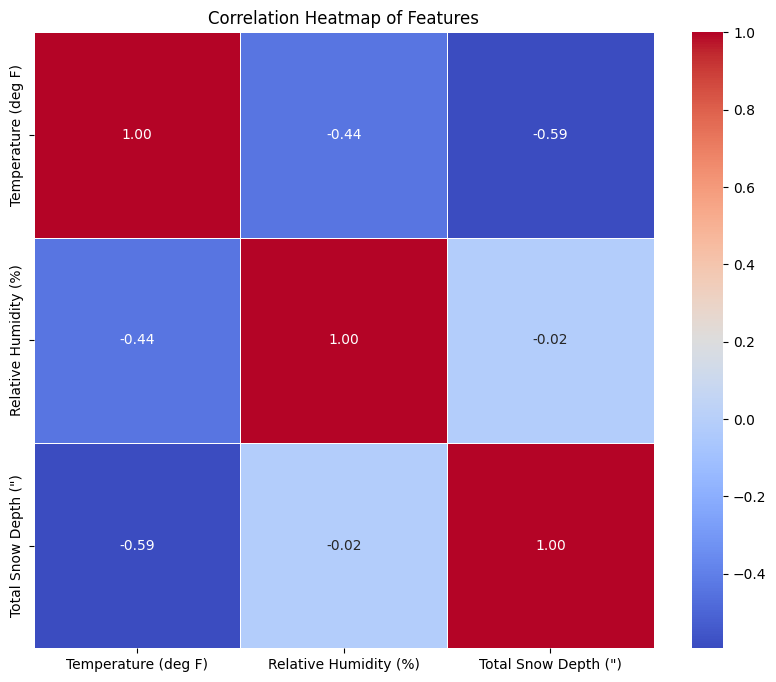

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = features.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title and labels
plt.title('Correlation Heatmap of Features')
plt.show()

In [36]:

# Define thresholds for temperature and humidity to indicate avalanche risk
def temp_risk(temp):
    if temp < 15:
        return 3  # High risk
    elif temp <= 32:
        return 2  # Moderate risk
    else:
        return 1  # Low risk

def humidity_risk(humidity):
    if humidity > 80:
        return 3  # High risk
    elif humidity >= 50:
        return 2  # Moderate risk
    else:
        return 1  # Low risk

# Apply the risk functions to the data
data['Temperature Risk'] = data['Temperature (deg F)'].apply(temp_risk)
data['Humidity Risk'] = data['Relative Humidity (%)'].apply(humidity_risk)

# Define a threshold for snow depth to indicate high avalanche risk
snow_depth_threshold = 20  # in inches

# Create a binary target variable for avalanche risk
data['Avalanche Risk'] = np.where(data['Total Snow Depth (")'] > snow_depth_threshold, 1, 0)

# Select features and target variable
features = data[['Temperature (deg F)', 'Relative Humidity (%)', 'Total Snow Depth (")']]
target = data['Avalanche Risk']

# Standardize the features to ensure equal scaling
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.3, random_state=42)

# Train a Logistic Regression model
logmodel = LogisticRegression(random_state=42)
logmodel.fit(X_train, y_train)

# Make probability predictions on the test set
y_pred_prob = logmodel.predict_proba(X_test)[:, 1]  # Probability of the positive class (avalanche risk)


In [37]:
# Training using Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier

# Train a Gradient Boosting model
gbmodel = GradientBoostingClassifier(random_state=42)
gbmodel.fit(X_train, y_train)

# Make probability predictions on the test set
y_pred_prob = gbmodel.predict_proba(X_test)[:, 1]  # Probability of the positive class (avalanche risk)

# Evaluate the model using ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'ROC AUC Score: {roc_auc:.2f}')


ROC AUC Score: 1.00


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = features.corr()

# Display the correlation matrix
print(correlation_matrix)


                       Temperature (deg F)  Relative Humidity (%)  \
Temperature (deg F)               1.000000              -0.438784   
Relative Humidity (%)            -0.438784               1.000000   
Total Snow Depth (")             -0.593025              -0.020216   

                       Total Snow Depth (")  
Temperature (deg F)               -0.593025  
Relative Humidity (%)             -0.020216  
Total Snow Depth (")               1.000000  


In [40]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# Display the first few rows and summary information about the dataset
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4216 entries, 0 to 4215
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date/Time (PST)             4216 non-null   datetime64[ns]
 1   Temperature (deg F)         4216 non-null   float64       
 2   Relative Humidity (%)       4216 non-null   float64       
 3   Total Snow Depth (")        4216 non-null   float64       
 4   Intermittent/Shot Snow (")  3083 non-null   float64       
 5   Temperature Risk            4216 non-null   int64         
 6   Humidity Risk               4216 non-null   int64         
 7   Avalanche Risk              4216 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 263.6 KB


(      Date/Time (PST)  Temperature (deg F)  Relative Humidity (%)  \
 0 2019-06-25 15:00:00                47.33                  89.90   
 1 2019-06-25 14:00:00                53.80                  69.82   
 2 2019-06-25 13:00:00                55.02                  65.32   
 3 2019-06-25 12:00:00                56.62                  54.77   
 4 2019-06-25 11:00:00                54.93                  58.87   
 
    Total Snow Depth (")  Intermittent/Shot Snow (")  Temperature Risk  \
 0                 16.46                         NaN                 1   
 1                 10.02                         NaN                 1   
 2                 12.31                         NaN                 1   
 3                 11.77                         NaN                 1   
 4                 12.12                         NaN                 1   
 
    Humidity Risk  Avalanche Risk  
 0              3               0  
 1              2               0  
 2              2       

In [41]:

# Summary of missing values
missing_data_summary = data.isnull().sum()

# Display the cleaned data and the summary of missing values
data.head(), missing_data_summary

(      Date/Time (PST)  Temperature (deg F)  Relative Humidity (%)  \
 0 2019-06-25 15:00:00                47.33                  89.90   
 1 2019-06-25 14:00:00                53.80                  69.82   
 2 2019-06-25 13:00:00                55.02                  65.32   
 3 2019-06-25 12:00:00                56.62                  54.77   
 4 2019-06-25 11:00:00                54.93                  58.87   
 
    Total Snow Depth (")  Intermittent/Shot Snow (")  Temperature Risk  \
 0                 16.46                         NaN                 1   
 1                 10.02                         NaN                 1   
 2                 12.31                         NaN                 1   
 3                 11.77                         NaN                 1   
 4                 12.12                         NaN                 1   
 
    Humidity Risk  Avalanche Risk  
 0              3               0  
 1              2               0  
 2              2       

In [42]:
# Train a Random Forest model
rfmodel = RandomForestClassifier(random_state=42, n_estimators=100)
rfmodel.fit(X_train, y_train)

# Make probability predictions on the test set
y_pred_prob = rfmodel.predict_proba(X_test)[:, 1]  # Probability of the positive class (avalanche risk)

# Evaluate the model using ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'ROC AUC Score: {roc_auc:.2f}')


ROC AUC Score: 1.00


In [45]:
# SVM

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report


# Create the proxy target variable for landslide occurrence
data['Avalanche Risk'] = ((data['Temperature (deg F)'] > 32) &
                           (data['Relative Humidity (%)'] > 80) &
                           (data['Total Snow Depth (")'] > 20)).astype(int)

# Select the first three columns as features
X = data[['Temperature (deg F)', 'Relative Humidity (%)', 'Total Snow Depth (")']]
y = data['Avalanche Risk']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train an SVM model
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predict probabilities on the test set
y_pred_prob = svm_model.predict_proba(X_test_scaled)[:, 1]

# Get classification report
classification_report_dict = classification_report(y_test, svm_model.predict(X_test_scaled), output_dict=True)

# Print the classification report
print(classification_report(y_test, svm_model.predict(X_test_scaled)))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1008
           1       0.95      0.97      0.96       257

    accuracy                           0.98      1265
   macro avg       0.97      0.98      0.97      1265
weighted avg       0.98      0.98      0.98      1265



                     Accuracy  Precision    Recall  F1 Score   ROC AUC
Random Forest        1.000000   1.000000  1.000000  1.000000  1.000000
SVM                  0.960474   0.933054  0.867704  0.899194  0.994553
Gradient Boosting    1.000000   1.000000  1.000000  1.000000  1.000000
Logistic Regression  0.859289   0.662551  0.626459  0.644000  0.916651


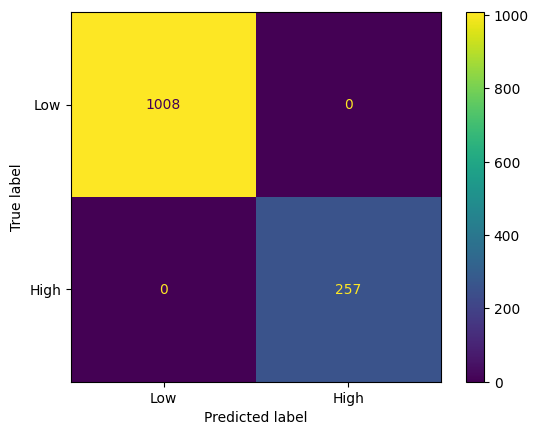

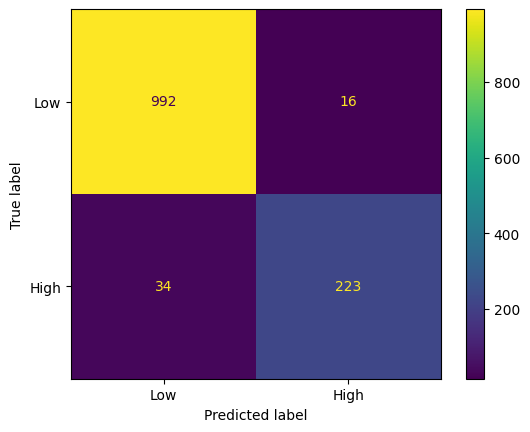

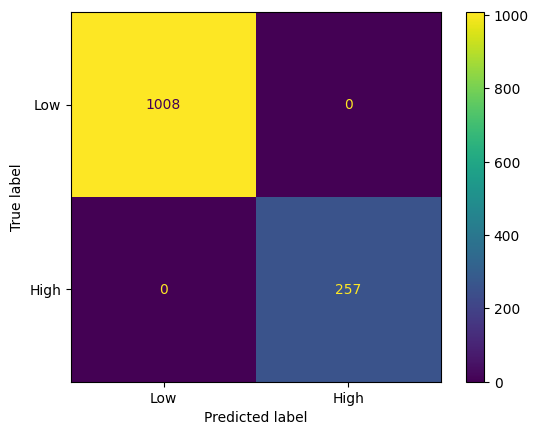

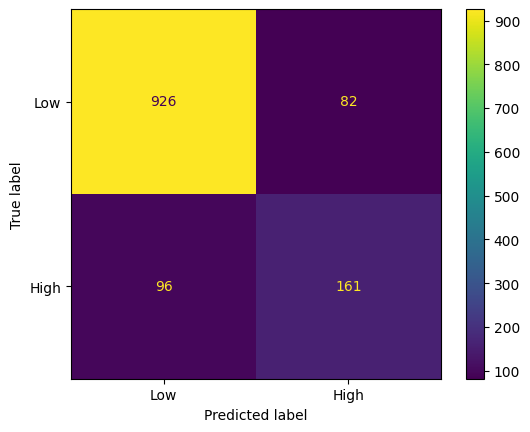

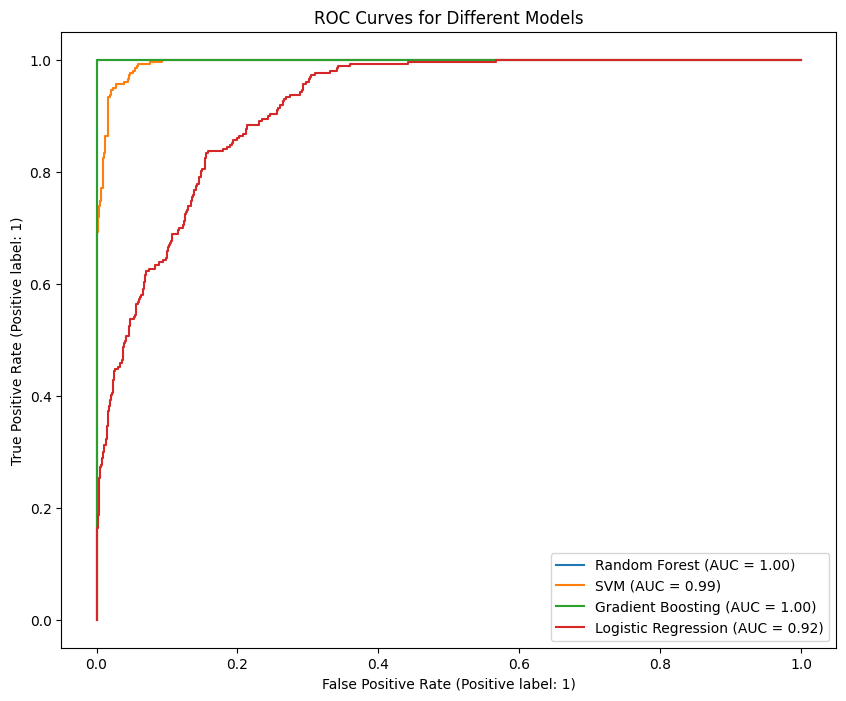

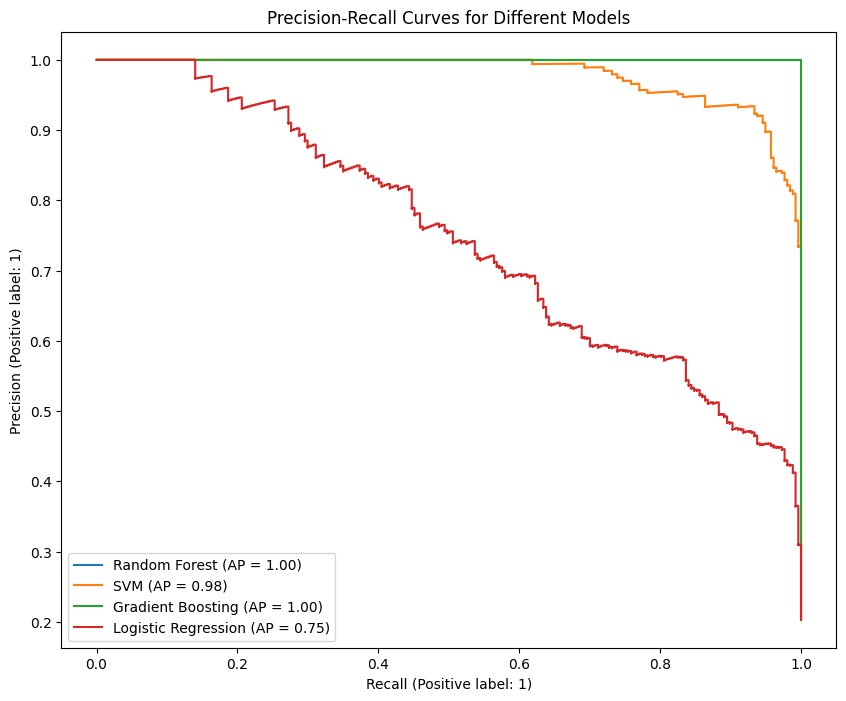

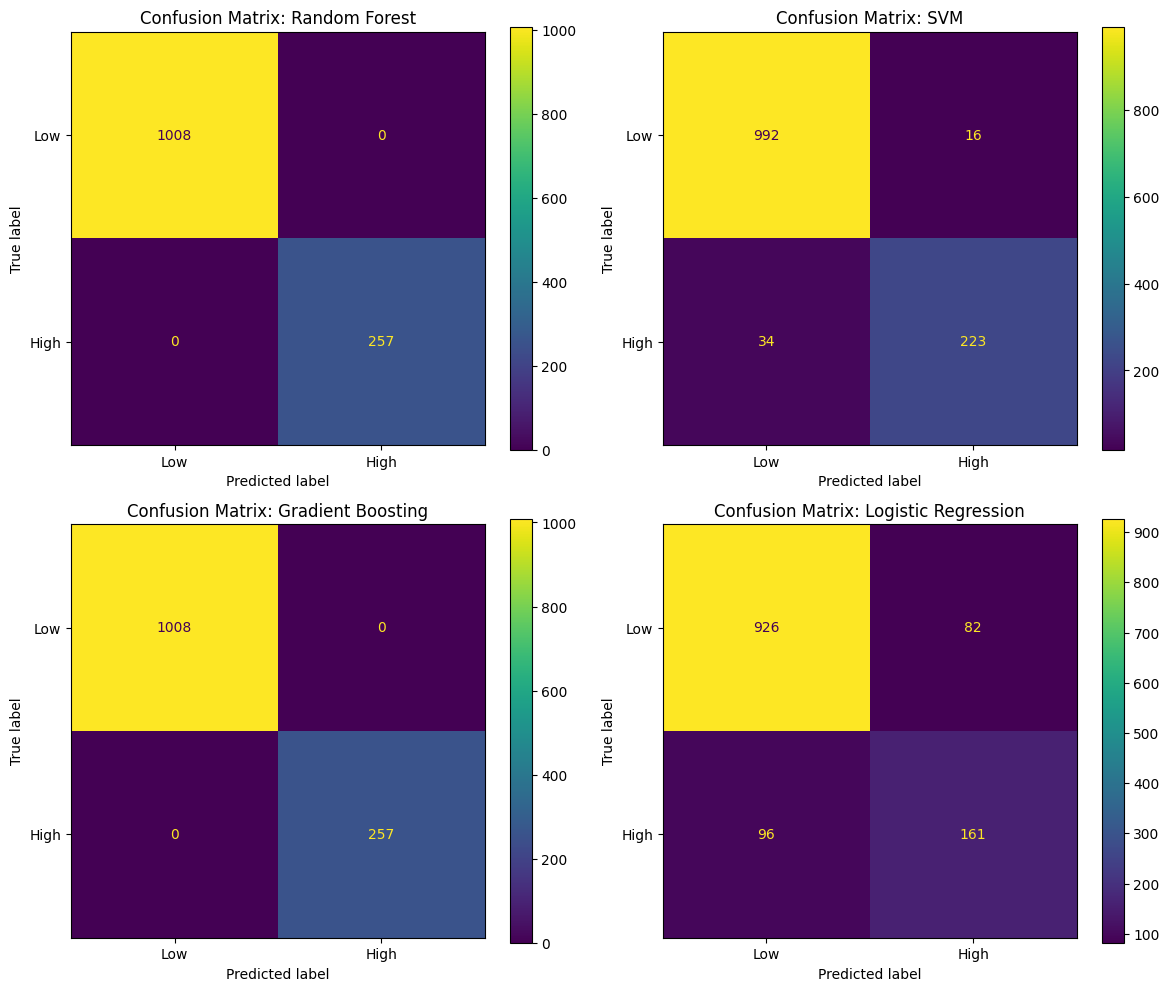

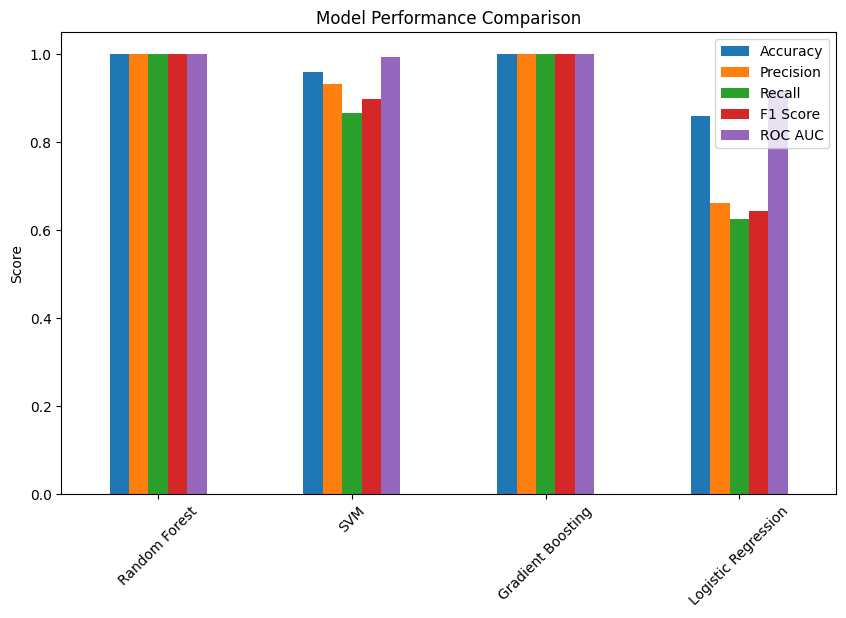

In [44]:

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, RocCurveDisplay, ConfusionMatrixDisplay,
    PrecisionRecallDisplay
)
import matplotlib.pyplot as plt
import seaborn as sns


# Features and target
X = data[['Temperature (deg F)', 'Relative Humidity (%)', 'Total Snow Depth (")']]
y = data['Avalanche Risk']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42)
}

# Train the models and collect their performance
results = {}
confusion_matrices = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_prob)
    }

    confusion_matrices[name] = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=['Low', 'High'])

# Display the comparative performance results
results_df = pd.DataFrame(results).T
print(results_df)

# Plot the ROC curves
plt.figure(figsize=(10, 8))
for name, model in models.items():
    RocCurveDisplay.from_estimator(model, X_test, y_test, name=name, ax=plt.gca())

plt.title('ROC Curves for Different Models')
plt.show()

# Plot the Precision-Recall curves
plt.figure(figsize=(10, 8))
for name, model in models.items():
    PrecisionRecallDisplay.from_estimator(model, X_test, y_test, name=name, ax=plt.gca())

plt.title('Precision-Recall Curves for Different Models')
plt.show()

# Plot the confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()
for ax, (name, cm_display) in zip(axes, confusion_matrices.items()):
    cm_display.plot(ax=ax)
    ax.title.set_text(f'Confusion Matrix: {name}')
plt.tight_layout()
plt.show()

# Bar chart for model performance metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
results_df[metrics].plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()


                     Accuracy  Precision    Recall  F1 Score   ROC AUC
Random Forest        1.000000   1.000000  1.000000  1.000000  1.000000
SVM                  0.960474   0.933054  0.867704  0.899194  0.994553
Gradient Boosting    1.000000   1.000000  1.000000  1.000000  1.000000
Logistic Regression  0.859289   0.662551  0.626459  0.644000  0.916651
                     R² Score           MSE
Random Forest        0.996484  5.691700e-04
SVM                  0.852395  2.389544e-02
Gradient Boosting    1.000000  2.937053e-10
Logistic Regression  0.426379  9.286190e-02


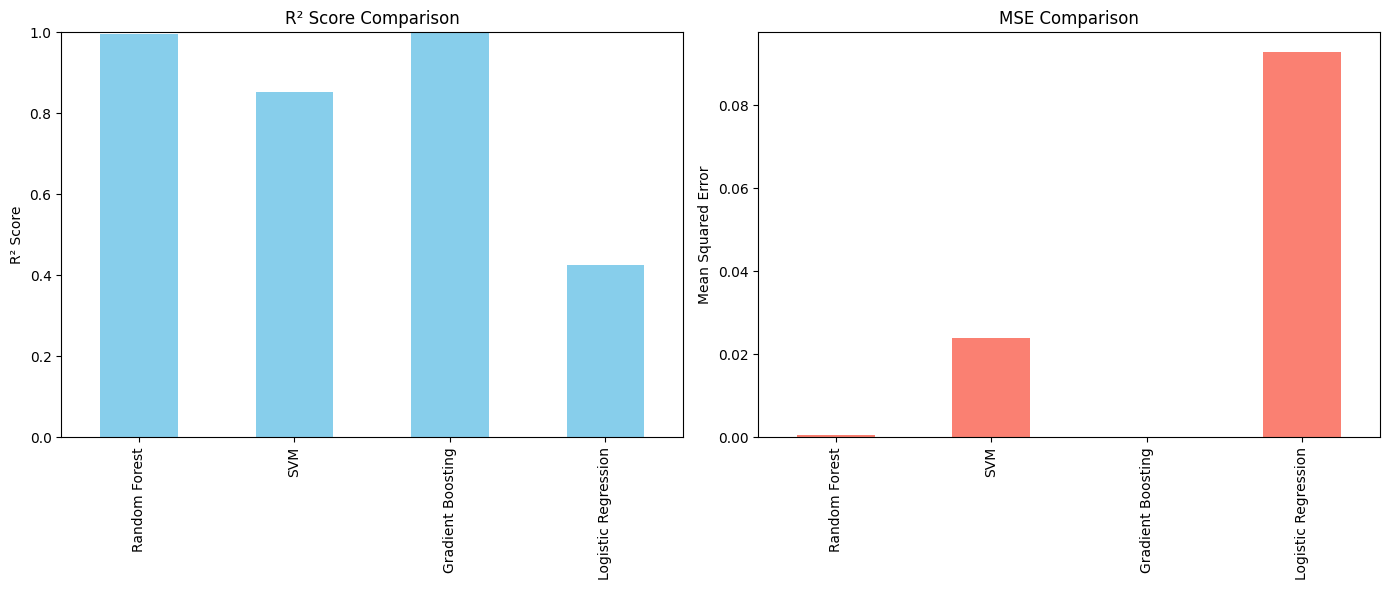

In [46]:

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix, r2_score, mean_squared_error
)
import matplotlib.pyplot as plt
import seaborn as sns

X = data[['Temperature (deg F)', 'Relative Humidity (%)', 'Total Snow Depth (")']]
y = data['Avalanche Risk']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42)
}

# Train the models and collect their performance
results = {}
regression_metrics = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_prob)
    }

    # Calculate regression metrics based on predicted probabilities
    regression_metrics[name] = {
        'R² Score': r2_score(y_test, y_prob),
        'MSE': mean_squared_error(y_test, y_prob)
    }

# Display the comparative performance results for classification
results_df = pd.DataFrame(results).T
print(results_df)

# Display the regression metrics
regression_metrics_df = pd.DataFrame(regression_metrics).T
print(regression_metrics_df)

# Plot the regression metrics
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart for R² Score
regression_metrics_df['R² Score'].plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('R² Score Comparison')
axes[0].set_ylabel('R² Score')
axes[0].set_ylim([0, 1])

# Bar chart for MSE
regression_metrics_df['MSE'].plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('MSE Comparison')
axes[1].set_ylabel('Mean Squared Error')

plt.tight_layout()
plt.show()
